# Project: Great British Bake Off 👩‍🍳🍰🇬🇧



___

## Outline of the Project 

The project has eight sections. Use the outline below to help you quickly navigate to the part of the project you're working on.

-  [Welcome 👋](#welcome)
-  [About the Show 📺](#about_show)
-  [About the Data 💾](#about_data)
-  Section 1. [Exploratory Data Analysis 🔎](#section1)  
-  Section 2. [Popular Ingredients 🍊 🍫](#section2) 
-  Section 3. [Gender Balance 👩⚖️🧑🏼](#section3)  
-  Section 4. [Well-Deserved? 🥇](#section4)  
-  Section 5. [Devilishly Difficult Challenges 😈](#section5)  
-  Section 6. [Piece of Cake? 🍰](#section6) 
-  Section 7. [Recipe Name Generator 👩‍🍳🖨️](#section7) 
-  Section 8. [Dishwashing 🧼🍽️](#section8) 

In [2]:
# Don't change this cell; just run it.
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import otter
grader = otter.Notebook()

<a id='about_show'></a>
## About the Show 📺

The Great British Bake Off (known in the US as the Great British Baking Show) is a competition-style television show where amateur bakers participate in themed baking challenges. Each week's episode revolves around a theme; past themes include Bread Week, Cake Week, Vegan Week, and Italian Week. In each episode, the bakers are given three timed challenges based on the week's theme: the Signature Challenge, the Technical Challenge, and the Showstopper Challenge. 

In the Signature Challenge, the judges broadly specify what the bakers should make, and the bakers have freedom to use flavors, techniques, and recipes as they wish. The Signature Challenge earns its name because it's an opportunity for bakers to express themselves and their unique baking style to both the judges and the viewers at home. Many of the Signature Challenge bakes come from tried-and-tested recipes that contestants like to bake for their friends and families. For example, during Festivals Week in Season 10, the bakers were tasked with creating 24 buns themed around a world festival or holiday. Contestant Henry Bird made [these Chocolate Kardemummabullar](https://thegreatbritishbakeoff.co.uk/recipes/all/henry-chocolate-kardemummabullar/).

<img src="data/signature_bake.png" width="500" height="500">

In the Technical Challenge, bakers have no idea what they will be asked to create until the timer for the challenge starts. This means they can't prepare for it, and they have to rely on their baking knowledge and intuition. The Technical Challenge earns its name because it tests the bakers' technical knowledge of baking as a discipline.  Each Technical Challenge is posed by one particular judge, and uses a recipe from the judge's own personal collection. Bakers are provided with ingredients and a recipe, which is usually extremely basic, sometimes lacking ingredient measurements or containing single steps like "make a shortcrust pastry." The finished products are judged blind and ranked from worst to best. An example of a Technical Challenge includes [judge Paul Hollywood's Baklava](https://thegreatbritishbakeoff.co.uk/recipes/all/paul-hollywood-baklava/). 

<img src="data/baklava.jpg" width="500" height="500">

The third challenge, the Showstopper, is similar to the Signature Challenge, in that bakers are given requirements ahead of time and have freedom to create their own recipes and prepare ahead of time. The main difference is that the Showstoppers are more challenging and larger-scale. The judges are looking for bakes that are breathtaking in both their appearance and their taste. For example, during Bread Week in Season 6, the bakers were asked to create a 3-D bread sculpture. Contestant Paul Jagger impressed the judges and millions of viewers with his *King of the Jungle* lion sculpture.

<img src="data/lion_bread_sculpture.png" width="500" height="500">

Each episode of the show features all three challenges. The contestants' bakes are tasted and assessed by two judges, and at the end of each episode, the hosts announce who will be eliminated from the competition and who will be recognized with a special award of "Star Baker" ⭐ (introduced in Season 2). Typically, one contestant is eliminated and one is crowned Star Baker ⭐, but on occasion there have been special cases in which zero or multiple people were eliminated or awarded Star Baker ⭐. 

The final episode of each season is held when there are just three bakers remaining. All three bakers compete in the final, and at the end, one winner is chosen and each of the others is considered a "runner-up". 

<a id='about_data'></a>
## About the Data 💾

For this project, I will be using a few different datasets, which i've loaded in and saved in DataFrames called
- `baker_weeks`, 
- `challenge_results`,  
- `technical_challenge_recipes`, and
- `bakers`.

Note that while the Great British Bake Off has filmed twelve seasons, the datasets do not include the most recent season(s). Since the datasets come from different [sources](#sources), some of these datasets include more seasons than others. In addition, the number of bakers each season has varied, but all seasons have filmed one episode per week.
 
The `baker_weeks` DataFrame includes a breakdown of each baker's performance each week (that is, each episode), for the first eleven seasons of the show. Each row represents information **for one baker for one week**. This means that each baker will appear in the DataFrame multiple times. Bakers will continue to appear in the DataFrame even in weeks after they got eliminated, so these rows will have missing values (`NaN`).  
  
The `'Week Name'` column contains the theme of that week's episode. It also has the baker's name, gender ("M" or "F" are the only options), and age, the season number (also called the series number in other DataFrames), and the week number within that season. There are columns that indicate whether each baker was a Star Baker ⭐ that week, was eliminated that week, competed that week, or went on to win the season's competition. A few columns require more explanation about the show:
- `'Judge'` is either "Mary" or "Prue". For the first seven seasons, the show's two judges were [Paul Hollywood](https://en.wikipedia.org/wiki/Paul_Hollywood) and [Mary Berry](https://en.wikipedia.org/wiki/Mary_Berry). After that, the show switched networks and Mary Berry was replaced by [Prue Leith](https://en.wikipedia.org/wiki/Prue_Leith). Since Paul Hollywood was a judge every season, the `'Judge'` column contains the name of the other judge.
- `'technical_rank'` contains a number reflecting each baker's ranking in the Technical Challenge (with 1 meaning 1st place, 2 meaning 2nd place, etc.)
-  `'Signature Handshake'` and `'Showstopper Handshake'` contain information on whether the contestant received a handshake 	🤝 from judge Paul Hollywood as he tasted their bake. Paul has a reputation for giving praise sparingly, and his so-called "[Hollywood Handshakes 	🤝](https://hollywoodhandshakes.com/)" are considered a great honor. 

In [3]:
baker_weeks = bpd.read_csv('data/baker_weeks.csv')
baker_weeks

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,"Series 11, Episode 10",11,10,Prue,Final,Marc E,M,51,0,NaN,0,0,0,0,0
1252,"Series 11, Episode 10",11,10,Prue,Final,Mark L,M,32,0,NaN,0,0,0,0,0
1253,"Series 11, Episode 10",11,10,Prue,Final,Peter,M,20,0,2.0,0,1,0,1,1
1254,"Series 11, Episode 10",11,10,Prue,Final,Rowan,M,55,0,NaN,0,0,0,0,0


The `challenge_results` DataFrame contains information on each challenge, with each row representing one baker in one specific episode. As in `baker_weeks`, bakers will reappear multiple times, even after they get eliminated, hence the abundance of `NaN` values. This dataset contains information for the first ten seasons of the show.

The `'result'` column indicates whether a baker was eliminated or stayed in the competition. Values of "OUT" and "Runner-up" mean the baker was eliminated, and values of "IN", "STAR BAKER", and "WINNER" mean that the baker stayed in the competition. There is one instance of "WD" in this column for someone who withdrew from the competition, and one instance of "A" for someone who was absent one week. We'll ignore both of these.

The `'technical'` column contains the baker's rank in the Technical Challenge, and the `'signature'` and `'showstopper'` columns contain the names of the recipes the baker prepared for these challenges.  

In [4]:
challenge_results = bpd.read_csv('data/challenge_results.csv')
challenge_results

,series,episode,baker,result,signature,technical,showstopper
0,1,1,Annetha,IN,Light Jamaican Black Cake with Strawberries an...,2.0,"Red, White & Blue Chocolate Cake with Cigarell..."
1,1,1,David,IN,Chocolate Orange Cake,3.0,Black Forest Floor Gateaux with Moulded Chocol...
2,1,1,Edd,IN,Caramel Cinnamon and Banana Cake,1.0,NaN
3,1,1,Jasminder,IN,Fresh Mango and Passion Fruit Hummingbird Cake,NaN,NaN
4,1,1,Jonathan,IN,Carrot Cake with Lime and Cream Cheese Icing,9.0,Three Tiered White and Dark Chocolate with Alm...
...,...,...,...,...,...,...,...
1131,10,10,Michael,NaN,NaN,NaN,NaN
1132,10,10,Michelle,NaN,NaN,NaN,NaN
1133,10,10,Phil,NaN,NaN,NaN,NaN
1134,10,10,Priya,NaN,NaN,NaN,NaN


The `technical_challenge_recipes` DataFrame contains information about each recipe that was given as a Technical Challenge in the first nine seasons. The columns specify the season (`'Ssn'`) and episode (`'Ep'`) that each recipe was baked in, which judge's recipe collection it came from (`'Whose'`), and several aspects of the recipe's complexity:
- number of components (`'Components'`), which are recipes used within the main recipe, such as a frosting or filling,
- number of ingredients (`'IngredCount'`),
- number of sentences in the instructions (`'RecipeSentences'`),
- number of dirty dishes produced (`'Dishes'`), and
- difficulty (`'DifficultyScore'`). 

In [5]:
technical_challenge_recipes = bpd.read_csv('data/technical_challenge_recipes.csv')
technical_challenge_recipes

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
1,1,2,Scone,Paul,https://thegreatbritishbakeoff.co.uk/scones/,1,5,15,6,1.8
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
4,1,5,Cornish pasties,Paul,https://www.bbc.com/food/recipes/classic_corni...,2,11,32,4,3.4
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


The `bakers` DataFrame contains a row for each baker from the first ten seasons, with detailed information about their results in the show, particularly about their performance in the Technical Challenge:
- `'technical_winner'`: number of times they won,
- `'technical_top3'`: number of times they placed in the top three,
- `'technical_bottom'`: number of times they placed last,
- `'technical_highest'`: highest (best) rank they ever earned,
- `'technical_lowest'`: lowest (worst) rank they ever earned, and
- `'technical_median'`: median of all ranks they ever earned.

It also includes information about when they appeared on the show and their demographics such as `'occupation'` and `'hometown'`.

In [6]:
bakers = bpd.read_csv('data/bakers.csv')
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,last_date_us,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,NaN,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,NaN,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,NaN,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,NaN,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,NaN,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,NaN,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,NaN,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,NaN,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,NaN,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F


The data comes from a variety of different [sources](#sources) and may contain errors.

<a id='section1'></a>
## Section 1: Exploratory Data Analysis 🔎

To start, we’ll perform some exploratory data analysis to get better acquainted with our data.

A common sentiment among long-time viewers of the show is that the baking challenges are getting harder over time.

 I will use the `technical_challenge_recipes` DataFrame, to create an overlaid line plot that shows the season number on the horizontal axis and on the vertical axis:
- average number of dirty dishes produced by recipes in that season, 
- average number of components in recipes in that season,
- average number of ingredients in recipes in that season, and 
- average difficulty score of recipes in that season.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_1
points: 1
manual: true
-->

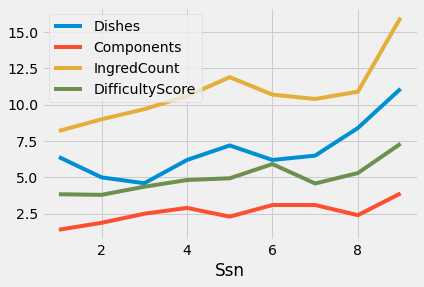

In [7]:
avg_technical = technical_challenge_recipes.groupby('Ssn').mean().get(['Dishes', 'Components', 'IngredCount', 'DifficultyScore'])
avg_technical.plot(kind='line');

<!-- END QUESTION -->



Some of the recipes the contestants bake are quite complicated. Let's look at some especially long recipe titles.

I will use the `challenge_results` DataFrame to find which Signature Challenge recipe had the longest name and save the results as `longest_signature`. 

Similarly, I will do the same with the Showstopper Challenge recipe that has the longest name and save the results as `longest_showstopper`. In both cases, longest means having the most individual characters, including punctuation and whitespace.

In [8]:
def longest(name):
    if (type(name) == str):
        return len(name)
    else:
        return 0

longest_challenge = challenge_results.assign(
    sig_len=challenge_results.get('signature').apply(longest)
)
longest_signature = longest_challenge.sort_values(by='sig_len', ascending=False).get('signature').iloc[0]
print("Longest signature name: ", longest_signature, "\n")

longest_challenge = challenge_results.assign(
    sig_len=challenge_results.get('showstopper').apply(longest)
)
longest_showstopper = longest_challenge.sort_values(by='sig_len', ascending=False).get('signature').iloc[0]
print("Longest showstopper name: ", longest_showstopper, "\n")

Longest signature name:  Beetroot Jelly on Poppy Seed Biscuits Spinach, Parmesan and Egg Tartlets Choux Buns with Goat's Cheese and Caramelised Onions 

Longest showstopper name:  Summery Salmon, Cod and Prawn Fish Pie 



Each of these recipes actually involves multiple items. Often the bakers have to make displays of baked goods with multiple components as part of a single challenge.

Another common sentiment among viewers is that the show favors younger people 👧🏽. To further explore the bakers' ages, i'll convert the `'age'` column to a categorical variable:

I have added an additional column called `'age_category'` to the `bakers` DataFrame, based on the following age categorization:

| Age            | Category    |
| -------------- | ----------- |
| (0, 39]        | Young       |
| (39, 59]       | Middle-Aged |
| (59, $\infty$] | Elderly     |

In [10]:
def age_categorize(age):
    if (age <= 39):
        return 'Young'
    elif ((age > 39) & (age <= 59)):
        return 'Middle-Aged'
    else:
        return 'Elderly'

bakers = bakers.assign(
    age_category=bakers.get('age').apply(age_categorize)
)
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F,Young
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M,Young
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M,Young
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F,Middle-Aged
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F,Young
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M,Middle-Aged
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F,Young
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F,Young


I have used the information in the new `'age_category'` column and set `age_prop` to a Series indexed by `'age_category'`, where the values are the proportions of bakers in each `'age_category'`.

In [12]:
age_prop = bakers.groupby('age_category').count()
ages = age_prop.get('series').values
props_arr = ages / 120
age_prop = age_prop.assign(
    proportion=props_arr
)
age_prop = age_prop.get('proportion')
age_prop

age_category
Elderly        0.100000
Middle-Aged    0.258333
Young          0.641667
Name: proportion, dtype: float64

From these values I notice that a majority of the participants are young!

Next, i'll investigate baker occupations. Do bakers on the show tend to hold certain types of jobs? Maybe they work in the food industry, do a lot of cooking at home, or have creative jobs like an artist 🎨 or photographer 📷. Some baking challenges even require significant feats of construction 🏗️, so maybe architects or engineers are popular.

I used the `bakers` DataFrame to create an array of occupations held by more than one contestant on the show and saved the array in a variable called `popular_jobs`.

In [14]:
popular_jobs = bakers.groupby('occupation').count()
popular_jobs = np.array(popular_jobs[popular_jobs.get('series') > 1].index)
popular_jobs 

array(['Banker', 'Full-time parent', 'Graphic Designer', 'Housewife',
       'Midwife', 'Nurse', 'PE teacher', 'Photographer', 'Retired',
       'Shop assistant', 'Student'], dtype=object)

<a id='section2'></a>
## Section 2: Popular Ingredients 🍊 🍫


Now, I will analyze the data about popular ingredients used in bakers' recipes, and whether there's any connection between certain ingredients and a baker's success in the competition. The data doesn't exactly include ingredient lists, but we do have recipe titles for the Signature and Showstopper Challenges in `challenge_results`, so we can look for common words there. I'll focus specifically on the Signature Challenge, as it's one in which bakers are able to be creative and showcase a recipe unique to them, and so they have complete freedom to use whatever ingredients they want. 


The DataFrame below contains all the rows of `challenge_results` with an entry in the `'signature'` column. I've also dropped the columns relating to the Technical and Showstopper Challenges, since i'll be focusing on the Signature Challenge here.

In [16]:
signatures = bpd.read_csv('data/signatures.csv')
signatures

,series,episode,baker,result,signature
0,1,1,Annetha,IN,Light Jamaican Black Cake with Strawberries an...
1,1,1,David,IN,Chocolate Orange Cake
2,1,1,Edd,IN,Caramel Cinnamon and Banana Cake
3,1,1,Jasminder,IN,Fresh Mango and Passion Fruit Hummingbird Cake
4,1,1,Jonathan,IN,Carrot Cake with Lime and Cream Cheese Icing
...,...,...,...,...,...
698,10,9,Rosie,OUT,"Lemon, Raspberry & Mint Domed Tarts"
699,10,9,Alice,STAR BAKER,"Mocha, Hazelnut & Orange Domed Tarts"
700,10,10,Alice,Runner-up,"Chocolate, Pear, Ginger and Maple Cake"
701,10,10,Steph,Runner-up,Black Forest Chocolate Cake


I will now attempt to clean up the text so we can find words that appear frequently in many recipe titles. The function named `clean_up_text` takes the name of a single recipe as input and returns a cleaned-up version of the name with these changes:
- Characters like: `(`, `)`, `'`, `"`, `;`, `,` (open and close parentheses, single and double quotes, semicolons, commas) will be removed
- Everything will be lowercased

In [17]:
def clean_up_text(recipe):
    '''Returns a lowercase version of recipe with certain special characters removed.'''
    clean = recipe.replace('(', '').replace(')','').replace('\'','').replace('\"','').replace(';','').replace(',','')
    return (clean.lower())

I will replace the entries in the `'signature'` column of the `signatures` DataFrame with the cleaned version of those recipe titles. Then, assign a new column to the `signatures` DataFrame called `'words'` that contains a list of all the words in the cleaned recipe title, in lowercase. I'll define a word as any chunk of text separated from others by spaces. For example, 
- a recipe title of `"Mint, Lilac, & Blackberry Cake"`
- should become `"mint lilac & blackberry cake"` when cleaned,
- with a corresponding word list of `["mint", "lilac", "&", "blackberry", "cake"]`.

In [19]:
def make_list(title):
    return title.split(' ')
signatures = signatures.assign(
    signature=signatures.get('signature').apply(clean_up_text)
)
signatures = signatures.assign(
    words=signatures.get('signature').apply(make_list)
)
signatures

,series,episode,baker,result,signature,words
0,1,1,Annetha,IN,light jamaican black cake with strawberries an...,"[light, jamaican, black, cake, with, strawberr..."
1,1,1,David,IN,chocolate orange cake,"[chocolate, orange, cake]"
2,1,1,Edd,IN,caramel cinnamon and banana cake,"[caramel, cinnamon, and, banana, cake]"
3,1,1,Jasminder,IN,fresh mango and passion fruit hummingbird cake,"[fresh, mango, and, passion, fruit, hummingbir..."
4,1,1,Jonathan,IN,carrot cake with lime and cream cheese icing,"[carrot, cake, with, lime, and, cream, cheese,..."
...,...,...,...,...,...,...
698,10,9,Rosie,OUT,lemon raspberry & mint domed tarts,"[lemon, raspberry, &, mint, domed, tarts]"
699,10,9,Alice,STAR BAKER,mocha hazelnut & orange domed tarts,"[mocha, hazelnut, &, orange, domed, tarts]"
700,10,10,Alice,Runner-up,chocolate pear ginger and maple cake,"[chocolate, pear, ginger, and, maple, cake]"
701,10,10,Steph,Runner-up,black forest chocolate cake,"[black, forest, chocolate, cake]"



Note to self: when you sum two lists together, the output is one giant list that contains all the elements in both lists combined. Example:


In [21]:
['List', 'combining'] + ['is', 'my', "passion"]

['List', 'combining', 'is', 'my', 'passion']

I will now combine all the words in the `'words'` column into one big list and save that list in the variable `all_words`.

In [22]:
all_words = signatures.get('words').sum()
# Just display the first ten words.
all_words[:10]

['light',
 'jamaican',
 'black',
 'cake',
 'with',
 'strawberries',
 'and',
 'cream',
 'chocolate',
 'orange']

The function `most_common` takes as input any list of words, and finds the ten most common words in that list. The function outputs a DataFrame with 10 rows, indexed by `'word'`, with one column called `'count'` containing a count of how many times each word appeared in the input list. The rows will be ordered in descending order of `'count'`.

I will then use function to find the ten most common words in `all_words`. These are the words that appeared the most in Signature Challenge recipe titles. THen I save the resulting DataFrame as `common_words_df`.

In [24]:
def most_common(word_list):
    '''Returns a DataFrame with the ten most common words in word_list, in descending order.'''
    
    word_list = np.array(word_list)
    words = np.unique(word_list)
    count = []
    
    for word in words:
        num_count = np.count_nonzero(word == word_list)
        count.append(num_count)
        
    df = bpd.DataFrame().assign(
        word=words,
        count=count
    ).set_index('word').sort_values(by='count', ascending=False).iloc[:10]
    
    return df

common_words_df = most_common(all_words)
common_words_df

,count
word,
and,363
cake,116
&,75
chocolate,74
with,58
orange,51
ginger,44
lemon,43
pie,37


I have found that the most common word is one that doesn't give us any information about the recipe. To deal with that, i'll omit common words, which are transition words like "and" and "with", as well as words like "cake" and "bread" that appear in the titles of many recipes that were featured in Cake Week or Bread Week.

I have made a list called `words_to_omit` with all the words that appear anywhere in the `'Week Name'` column of the `baker_weeks` DataFrame. 

The words in `words_to_omit` are all lowercase, regardless of their case in the `'Week Name'` column. Also, `words_to_omit` does not have any duplicate words. Even if a word appears in the `'Week Name'` column multiple times, it should only appear once in `words_to_omit`.

For example, one week's theme was "Pie and Tart", so the words "pie", "and", and "tart" should all be elements of `words_to_omit`.

In [26]:
def lower(name):
    new_str = name.lower()
    return new_str.split(' ')

words_to_omit = np.unique(baker_weeks.get('Week Name').apply(lower).sum()).tolist()

# Just display the first ten words.
words_to_omit#[:10]

['1980s',
 'advanced',
 'alternative',
 'and',
 'batter',
 'biscuits',
 'botanical',
 'bread',
 'cake',
 'cakes',
 'caramel',
 'chocolate',
 'dairy',
 'danish',
 'dessert',
 'dough',
 'european',
 'festivals',
 'final',
 'forgotten',
 'italian',
 'japanese',
 'pastry',
 'pie',
 'pudding',
 'pâtisserie',
 'roaring',
 'spice',
 'sweet',
 'tart',
 'tarts',
 'tudor',
 'twenties',
 'unconventional',
 'vegan',
 'victorian']

I will now use the `in` operator in python. The `in` operator checks if a value is an element of a list. For example:

In [28]:
"macaroni" in ["macaroni", "and", "cheese"]

True

In [29]:
"mac" in ["macaroni", "and", "cheese"]

False

The DataFrame called `meaningful`, will now have the same data as the `signatures` DataFrame plus an extra column called `'meaningful_words'`, containing a list of all the words that appear in the `'words'` column, except with these words omitted:
- "and"
- "&"
- "with"
- any word in `words_to_omit`

In [30]:
def omit(word_list):
    to_return = []
    omit_list = ["&", "with"] + words_to_omit
    for word in word_list:
        if (word in omit_list):
            continue
        else:
            to_return.append(word)
    return to_return

meaningful = signatures.assign(
    meaningful_words=signatures.get('words').apply(omit)
)
meaningful

,series,episode,baker,result,signature,words,meaningful_words
0,1,1,Annetha,IN,light jamaican black cake with strawberries an...,"[light, jamaican, black, cake, with, strawberr...","[light, jamaican, black, strawberries, cream]"
1,1,1,David,IN,chocolate orange cake,"[chocolate, orange, cake]",[orange]
2,1,1,Edd,IN,caramel cinnamon and banana cake,"[caramel, cinnamon, and, banana, cake]","[cinnamon, banana]"
3,1,1,Jasminder,IN,fresh mango and passion fruit hummingbird cake,"[fresh, mango, and, passion, fruit, hummingbir...","[fresh, mango, passion, fruit, hummingbird]"
4,1,1,Jonathan,IN,carrot cake with lime and cream cheese icing,"[carrot, cake, with, lime, and, cream, cheese,...","[carrot, lime, cream, cheese, icing]"
...,...,...,...,...,...,...,...
698,10,9,Rosie,OUT,lemon raspberry & mint domed tarts,"[lemon, raspberry, &, mint, domed, tarts]","[lemon, raspberry, mint, domed]"
699,10,9,Alice,STAR BAKER,mocha hazelnut & orange domed tarts,"[mocha, hazelnut, &, orange, domed, tarts]","[mocha, hazelnut, orange, domed]"
700,10,10,Alice,Runner-up,chocolate pear ginger and maple cake,"[chocolate, pear, ginger, and, maple, cake]","[pear, ginger, maple]"
701,10,10,Steph,Runner-up,black forest chocolate cake,"[black, forest, chocolate, cake]","[black, forest]"


I will now find the ten most common words **among only the meaningful ones** by creating a DataFrame called `popular_words` formatted in the same way as `common_words_df`.

In [32]:
popular_words = most_common(meaningful.get('meaningful_words').values.sum())
popular_words

,count
word,
orange,51
ginger,44
lemon,43
apple,37
buns,29
almond,24
raspberry,24
loaf,23
walnut,23


The most common word should now be the name of a popular ingredient or flavor in British baking. Yum!

Now I will figure out which meaningful words were most popular in Signature Challenge recipe titles among bakers who were eliminated. These might be harder ingredients or flavors to get right, or ones that are less popular with the judges, and so I might caution future contestants about using these. ⚠️

I will implement `most_common` function to produce a DataFrame with the ten most common meaningful words, among Signature Challenge recipes in which the baker was eliminated that week and name that DataFrame `common_out`.

In [34]:
eliminated = meaningful[(meaningful.get('result') == "OUT") | (meaningful.get('result') == "Runner-up")]

common_out = most_common(eliminated.get('meaningful_words').values.sum())
common_out

,count
word,
ginger,10
lemon,8
orange,8
buns,6
walnut,6
loaf,5
cheese,5
mushroom,4
pies,4


Now let's look at the meaningful words that were most popular in Signature Challenge recipe titles among bakers who didn't get eliminated. What special ingredients did they use? These might be more well-loved flavors and ingredients, and maybe the bakers themeselves consider them safe choices for baking foods that the judges will enjoy! 😋

I will use `most_common` to produce a DataFrame with the ten most common meaningful words, among Signature Challenge recipes in which the baker stayed in the competition that week and name that DataFrame `common_in`.

In [36]:
not_eliminated = meaningful[(meaningful.get('result') == "IN") | (meaningful.get('result') == "STAR BAKER") | (meaningful.get('result') == "WINNER")]


common_in = most_common(not_eliminated.get('meaningful_words').values.sum())
common_in

,count
word,
orange,43
lemon,35
ginger,34
apple,33
almond,24
buns,23
raspberry,20
puddings,19
rhubarb,18


You'll notice that some ingredients are common among people who get eliminated and people who stayed, and that's just because they're common recipe ingredients generally. It's more interesting to look at the words that appear in only one of `common_out` and `common_in`.

<a id='section3'></a>
## Section 3: Gender Balance 👩⚖️🧑🏼
After watching a couple of episodes, I have started to wonder if more female bakers than male bakers have been selected to participate in the Great British Bake Off.

Using the `baker_weeks` DataFrame, I will first count the total number of bakers in the first 11 seasons of the show and assign the answer to the variable `baker_count`.

Then, I will compute the proportion of female bakers and the proportion of male bakers in the first 11 seasons of the show. Then Assign the answers to the variables `observed_female_prop` and  `observed_male_prop`. 

Note to self:`baker_weeks` has a row for each baker for each week, so I can't directly calculate proportions from the `'Gender'` column of that DataFrame.

In [38]:
baker_weeks

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,"Series 11, Episode 10",11,10,Prue,Final,Marc E,M,51,0,NaN,0,0,0,0,0
1252,"Series 11, Episode 10",11,10,Prue,Final,Mark L,M,32,0,NaN,0,0,0,0,0
1253,"Series 11, Episode 10",11,10,Prue,Final,Peter,M,20,0,2.0,0,1,0,1,1
1254,"Series 11, Episode 10",11,10,Prue,Final,Rowan,M,55,0,NaN,0,0,0,0,0


In [39]:
grouped = baker_weeks.groupby(['Baker', 'Season']).max()

baker_count = grouped.shape[0]
observed_female_prop = grouped[grouped.get('Gender') == 'F'].shape[0] / baker_count
observed_male_prop = grouped[grouped.get('Gender') == 'M'].shape[0] / baker_count


print("Female Proportions: " + str(observed_female_prop))
print("Male Proprotions: " + str(observed_male_prop))
print("Number of Bakers: " + str(baker_count))
grouped

Female Proportions: 0.5151515151515151
Male Proprotions: 0.48484848484848486
Number of Bakers: 132


,,Episode,Week Number,Judge,Week Name,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
Baker,Season,,,,,,,,,,,,,
Ali,4,"Series 4, Episode 9",10,Mary,Unconventional,M,25,0,11.0,0,0,1,1,0
Alice,10,"Series 10, Episode 9",10,Prue,Roaring Twenties,F,29,0,8.0,0,1,1,1,0
Alvin,6,"Series 6, Episode 9",10,Mary,Victorian,M,37,0,9.0,0,0,1,1,0
Amelia,10,"Series 10, Episode 9",10,Prue,Roaring Twenties,F,24,0,11.0,0,0,1,1,0
Andrew,7,"Series 7, Episode 9",10,Mary,Tudor,M,25,0,12.0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Urvashi,2,"Series 2, Episode 8",8,Mary,Tarts,F,40,0,9.0,0,0,1,1,0
Val,7,"Series 7, Episode 9",10,Mary,Tudor,F,66,0,10.0,0,0,1,1,0
Victoria,3,"Series 3, Episode 9",10,Mary,Tarts,F,50,0,7.0,0,1,1,1,0


I have recognized that `observed_female_prop` and `observed_male_prop` are similar but they're not exactly the same. Is this just random chance at play, or are female bakers actually more likely to be on the show? I will now do a hypothesis test with the following hypotheses:

- **Null Hypothesis**: Bakers on the show are drawn randomly from a population that’s 50% female and 50% male. 
- **Alternative Hypothesis**: Bakers on the show are not drawn randomly from a population that’s 50% female and 50% male.

In [41]:
null_distribution = np.array([0.5, 0.5])
null_distribution

array([0.5, 0.5])

**Question 3.2.** To perform the hypothesis test, I will simulate drawing a random sample of size `baker_count` from the null distribution, and then compute a test statistic on each simulated sample. I will first choose a reasonable test statistic that will help determine whether to reject the null hypothesis.

I will now find all valid test statistics that I could use for this hypothesis test and save the numbers of my choices in a `list` called `gender_test_statistics`. Valid test statistics are ones that would allow me to distinguish between the null and alternative hypotheses. 

1. The absolute difference between the proportion of female bakers and 0.5.
2. The absolute difference between the number of male bakers and the number of female bakers. 
3. The absolute difference between the number of female bakers and one half of `baker_count`.
4. Three times the absolute difference between the proportion of male bakers and 0.5.
5. The total variation distance between the gender distribution of bakers and the null distribution.

In [42]:
gender_test_statistics = [1,2,3,4,5]
gender_test_statistics

[1, 2, 3, 4, 5]

For this hypothesis test, i'll use as our test statistic the absolute difference between the observed proportion of female bakers and 0.5, the expected proportion under the assumptions of the null hypothesis. Then I will set the variable `observed_gender_stat` to the observed value of this statistic.

In [44]:
observed_gender_stat = abs(observed_female_prop - 0.5)
observed_gender_stat

0.015151515151515138

In [45]:
grader.check("q3_3")

q3_3 results: All test cases passed!

I have written a simulation that runs 10,000 times, each time drawing a random sample of size `baker_count` from the null distribution and kept track of the simulated test statistics in the `gender_stats` array. 

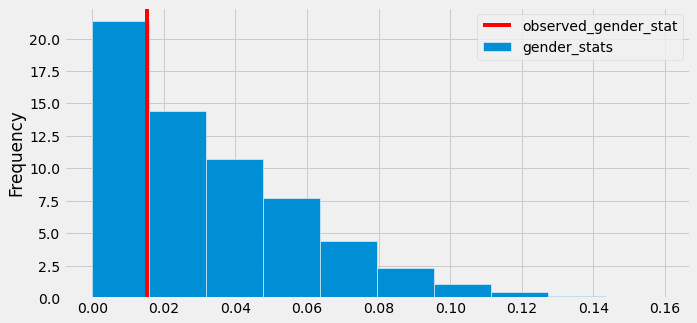

In [46]:
gender_stats = np.array([])
repititions = 10000

for i in np.arange(repititions):
    sample_stat = abs((np.random.multinomial(baker_count, null_distribution)[0] / baker_count) - 0.5)
    gender_stats = np.append(gender_stats, sample_stat)
    
# Visualize with a histogram
bpd.DataFrame().assign(gender_stats=gender_stats).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_gender_stat, color='red', label='observed_gender_stat')
plt.legend();

The null hypothesis was that the bakers on the show are drawn randomly from a population that’s 50% female and 50% male. I have computed the p-value for this hypothesis test, and saved the result to `gender_p_value`.

In [48]:
gender_p_value = np.count_nonzero(gender_stats >= observed_gender_stat) / repititions
gender_p_value

0.791

The p-value is nowhere near the standard cutoff of 0.05 for statistical significance. So in this case, I fail to reject the null. 

It's important to note that even though I have failed to reject the null, we’re not saying that bakers *were* necessarily drawn randomly from a population that’s 50% female and 50% male. In fact, nothing is random about how people get to be on the show. 

There are a lot of rules about who can apply to be on the show, and applicants are thoroughly vetted through an extensive [application process](https://gbbo.take-part.co.uk/info/rules) that involves an interview and a background check to ensure that none of the bakers have any sort of professional training or are friends or relatives of the judges. Simply put, bakers on the show are not selected via a purely random process.

When I say we fail to reject the null, this means that the bakers *could have* been drawn from a model that's 50% female and 50% male, but it doesn't mean they *were*.


Conceptually, if statistics in `gender_stats` were to change  if `baker_count` were a much larger value, the values in `gender_stats` would be **smaller**. We'd be **more** likely to reject the null hypothesis if `observed_gender_stat` remained the same.

<a id='section4'></a>
## Section 4. Well-Deserved? 🥇

In this section, I will use permutation testing to decide if different groups of bakers have similar technical abilities, as measured by their rankings in the Technical Challenges. Let's look at the `baker_weeks` DataFrame which has a row for each baker for each week of the show, including for the remainder of the season after they've been eliminated. I will keep the data for the bakers that actually competed in each week's episode. Since ten bakers participated in the first episode of Season 1, i'll look at the first ten rows of the resulting `competed` DataFrame. 

In [52]:
competed = baker_weeks[baker_weeks.get('Competed') == 1]
competed.take(np.arange(10))

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0
5,"Series 1, Episode 1",1,1,Mary,Cake,Lea,F,51,0,10.0,0,0,1,1,0
6,"Series 1, Episode 1",1,1,Mary,Cake,Louise,F,44,0,NaN,0,0,1,1,0
7,"Series 1, Episode 1",1,1,Mary,Cake,Mark,M,48,0,NaN,0,0,0,1,0
8,"Series 1, Episode 1",1,1,Mary,Cake,Miranda,F,37,0,8.0,0,0,0,1,0
9,"Series 1, Episode 1",1,1,Mary,Cake,Ruth,F,31,0,NaN,0,0,0,1,0


In the `'Technical Rank'` column, contestants are given a ranking for how well they performed in the Technical Challenge, with 1 being the best. Notice in the first ten rows of `competed` shown above, some of the middle rankings are missing. In this episode, the judges didn't reveal everyone's rank and instead just pointed out the top three and bottom three contestants. For reasons like this, our dataset has just a few missing values, which we will ignore for this section. 

If I want to get a sense of how skilled a baker is, the technical rank is helpful, but needs to be taken in the context of the number of contestants still in the competition. For example, ranking 3rd place in the first week is a lot more impressive than ranking 3rd place in the final week, when there are just three bakers remaining. To address this problem, we'll convert these rankings into *percentiles* to measure skill relative to the number of contestants remaining. 

For example, if there are four contestants remaining, a technical ranking of:
- 4 corresponds to the 25th percentile
- 3 corresponds to the 50th percentile
- 2 corresponds to the 75th percentile
- 1 corresponds to the 100th percentile

The DataFrame called `perc` will have the same data as `competed`, plus a new column called `'Contestants'`  that contains the number of contestants that competed each week. For example, since the first ten rows of `competed` all correspond to the first week of the first season, in which there were 10 bakers, the first ten entries of the `'Contestants'` column should be 10.  

In [53]:
# Your task is to add the Contestants column.
grouped = competed.groupby('Episode').sum()
def fill_contestants(episode):
    num_competed = grouped.get('Competed').loc[episode]
    return num_competed

perc = competed.assign(
    Contestants=competed.get('Episode').apply(fill_contestants)
)
# We've added the Percentile column for you.
perc = perc.assign(Percentile = np.round((1 - (perc.get('Technical Rank') - 1) / perc.get('Contestants')) * 100, 1))
perc

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner,Contestants,Percentile
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0,10,90.0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0,10,80.0
2,"Series 1, Episode 1",1,1,Mary,Cake,Edd,M,24,0,1.0,0,0,0,1,1,10,100.0
3,"Series 1, Episode 1",1,1,Mary,Cake,Jasminder,F,45,0,NaN,0,0,0,1,0,10,NaN
4,"Series 1, Episode 1",1,1,Mary,Cake,Jonathan,M,25,0,9.0,0,0,0,1,0,10,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Laura,F,31,0,4.0,0,0,0,1,0,4,25.0
1241,"Series 11, Episode 9",11,9,Prue,Pâtisserie,Peter,M,20,0,1.0,0,1,0,1,1,4,100.0
1244,"Series 11, Episode 10",11,10,Prue,Final,Dave,M,30,0,1.0,0,0,1,1,0,3,100.0
1246,"Series 11, Episode 10",11,10,Prue,Final,Laura,F,31,0,3.0,0,0,1,1,0,3,33.3


Now let's compare two groups of bakers to see if they are comparably skilled. Let's start with comparing the winners to the non-winners. I'll conduct a permutation test with the following hypotheses.

- **Null Hypothesis** : The `'Percentile'` data for winners comes from the same distribution as the `'Percentile'` data for non-winners. In other words, winners and non-winners perform equally well in Technical Challenges.
- **Alternate Hypothesis** : The `'Percentile'` data for winners and the `'Percentile'` data for non-winners come from different distributions. Winners perform better in Technical Challenges than non-winners.

As usual, i'll use the difference in group means as our test statistic. Here, i'll compute that as the mean for the winners minus the mean for the non-winners.

The observed value of the test statistic saved as `observed`.

In [55]:
observed = perc[perc.get('Winner') == 1].get('Percentile').mean() - perc[perc.get('Winner') == 0].get('Percentile').mean()
observed

12.451918030370031

I have created 1000 simulated values of the test statistic under the assumptions of the null hypothesis, and saved the simulated test statistics in the array `simulated_stats`.  Then I created an appropriate visualization showing the distribution of the values in `simulated_stats` array. 

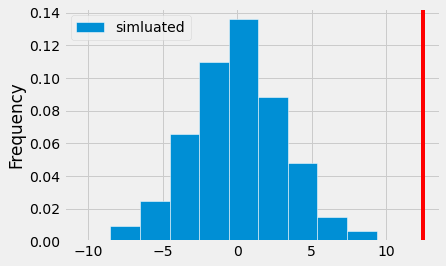

In [57]:
# Run your simulation here.
simulated_stats = np.array([])

for i in np.arange(1000):
    shuffle = np.random.permutation(perc.get('Percentile'))
    df = perc.assign(
        Percentile=shuffle
    )
    stat = df[df.get('Winner') == 1].get('Percentile').mean() - df[df.get('Winner') == 0].get('Percentile').mean()
    simulated_stats = np.append(simulated_stats, stat)

# Plot your visualization here.
bpd.DataFrame().assign(simluated=simulated_stats).plot(kind='hist', density=True, ec='w');
plt.axvline(observed, color='red', label='observed difference in means');

The winning contestants claim that they are more technically skilled than the other contestants. Based on my permutation test, using a p-value cutoff of 0.01, this claim is likely accurate. I have set `winners_claim` to be True.

In [59]:
p_val = np.count_nonzero(simulated_stats >= observed) / 1000

winners_claim = True
print(winners_claim, p_val)

True 0.0




Now, i'll do a similar permutation test, but this time comparing the Technical Challenge `'Percentile'` of contestants who received a coveted handshake 🤝 from Paul Hollywood at least once to those who never did.


![](https://media.giphy.com/media/3o7TKRoSl2BrFuK75u/giphy.gif)

The DataFrame called `earned`, indexed by `'Season'` and `'Baker'`, that has a row for each baker who received a handshake 🤝 **at any point** in the season, and a single column called `'Handshake'` containing all ones. 

Similarly, I will create a DataFrame called `not_earned`, indexed by `'Season'` and `'Baker'`, that has a row for each baker who **never** received a handshake 🤝, and a single column called `'Handshake'` containing all zeros. 

In [61]:
earned = perc.groupby(['Season','Baker']).max()
earned = earned[(earned.get('Signature Handshake') > 0) | (earned.get('Showstopper Handshake') > 0)]
earned = earned.assign(
    Handshake=np.ones(earned.shape[0])
)
earned = earned.get(['Handshake'])
earned

Handshake
Season Baker             
3      Ryan           1.0
4      Frances        1.0
5      Luis           1.0
       Norman         1.0
6      Nadiya         1.0
...                   ...
10     David          1.0
       Henry          1.0
       Michael        1.0
       Steph          1.0
11     Lottie         1.0

[27 rows x 1 columns]

In [63]:
not_earned = perc.groupby(['Season','Baker']).max()
not_earned = not_earned[(not_earned.get('Signature Handshake') == 0) & (not_earned.get('Showstopper Handshake') == 0)]
not_earned = not_earned.assign(
    Handshake=np.zeros(not_earned.shape[0])
)
not_earned = not_earned.get(['Handshake'])
not_earned

Handshake
Season Baker               
1      Annetha          0.0
       David            0.0
       Edd              0.0
       Jasminder        0.0
       Jonathan         0.0
...                     ...
11     Marc E           0.0
       Mark L           0.0
       Peter            0.0
       Rowan            0.0
       Sura             0.0

[105 rows x 1 columns]

The `earned` and `not_earned` DataFrames contain the information I need to determine who falls into which group for our permutation test, but I need to combine this data with the Technical Challenge percentiles in `perc`. 

The first step is to combine the rows of `earned` and with those of `not_earned`. I'll do this using the `babypandas` DataFrame method `.append`, which is similar to the familiar `np.append`, but for DataFrames instead of arrays. The cell below puts the rows of `not_earned` onto the end of `earned` and saves the result as `shakes`. 

In [65]:
shakes = earned.append(not_earned)
shakes

Handshake
Season Baker             
3      Ryan           1.0
4      Frances        1.0
5      Luis           1.0
       Norman         1.0
6      Nadiya         1.0
...                   ...
11     Marc E         0.0
       Mark L         0.0
       Peter          0.0
       Rowan          0.0
       Sura           0.0

[132 rows x 1 columns]

Now I need to merge `shakes` with `perc` to get the handshake 🤝 data and the percentile data in one DataFrame. Since there are multiple bakers that share a name, we need to merge by *both* `'Season'` and `'Baker'`, which I can do by merging on a `list` containing both column names. 

In [66]:
perc_shakes = perc.merge(shakes, left_on=['Season', 'Baker'], right_index=True)
perc_shakes

,Episode,Season,Week Number,Judge,Week Name,Baker,Gender,Age,Signature Handshake,Technical Rank,Showstopper Handshake,Star Baker,Eliminated,Competed,Winner,Contestants,Percentile,Handshake
0,"Series 1, Episode 1",1,1,Mary,Cake,Annetha,F,30,0,2.0,0,0,0,1,0,10,90.0,0.0
10,"Series 1, Episode 2",1,2,Mary,Biscuits,Annetha,F,30,0,7.0,0,0,1,1,0,8,25.0,0.0
1,"Series 1, Episode 1",1,1,Mary,Cake,David,M,31,0,3.0,0,0,0,1,0,10,80.0,0.0
11,"Series 1, Episode 2",1,2,Mary,Biscuits,David,M,31,0,8.0,0,0,0,1,0,8,12.5,0.0
21,"Series 1, Episode 3",1,3,Mary,Bread,David,M,31,0,4.0,0,0,0,1,0,6,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,"Series 11, Episode 3",11,3,Prue,Bread,Rowan,M,55,0,10.0,0,0,1,1,0,10,10.0,0.0
1147,"Series 11, Episode 1",11,1,Prue,Cake,Sura,F,31,0,1.0,0,0,0,1,0,12,100.0,0.0
1159,"Series 11, Episode 2",11,2,Prue,Biscuits,Sura,F,31,0,6.0,0,0,0,1,0,11,54.5,0.0
1171,"Series 11, Episode 3",11,3,Prue,Bread,Sura,F,31,0,7.0,0,0,0,1,0,10,40.0,0.0


Now I will perform a permutation test to help you analyze the following claim. 

The contestants who have gotten a handshake 🤝 claim that they are more technically skilled than the other contestants. Based on my permutation test, using a p-value of cutoff of 0.01, the claim is likely to be false. I have set `handshake_claim` to False.

In [67]:
observed_shakes = perc_shakes[perc_shakes.get('Handshake') == 1].get('Percentile').mean() - perc_shakes[perc_shakes.get('Handshake') == 0].get('Percentile').mean()
observed_shakes

4.551616063476658

0.014


False

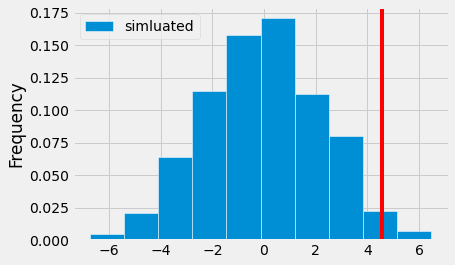

In [68]:
simulated_shakes = np.array([])

for i in np.arange(1000):
    shuffled = np.random.permutation(perc_shakes.get('Handshake'))
    df = perc_shakes.assign(
        Handshake=shuffled
    )
    stat = df[df.get('Handshake') == 1].get('Percentile').mean() - df[df.get('Handshake') == 0].get('Percentile').mean()
    simulated_shakes = np.append(simulated_shakes, stat)
    
bpd.DataFrame().assign(simluated=simulated_shakes).plot(kind='hist', density=True, ec='w');
plt.axvline(observed_shakes, color='red', label='observed difference in means');

p_val = np.count_nonzero(simulated_shakes >= observed_shakes) / 1000

print(p_val)
handshake_claim = True if (p_val <= 0.01) else False
handshake_claim

<a id='section5'></a>
## Section 5: Devilishly Difficult Challenges 😈

Contestants on the Great British Bake Off sometimes groan when the hosts announce that the upcoming Technical Challenge was chosen by judge Paul Hollywood. Paul has a reputation for posing exceptionally difficult challenges and most bakers believe that his recipes are much harder than those of his co-judges, Mary Berry and Prue Leith. I want to examine whether this theory is justified by the data. 

The `technical_challenge_recipes` DataFrame contains 83 Technical Challenge recipes from seasons 1 through 9. Each Technical Challenge is posed by one particular judge, and comes from their personal collection of recipes. In the first nine seasons, Mary posed 32 Technical Challenges, Paul posed 41, and Prue posed 10. The `technical_challenge_recipes` DataFrame includes a `'DifficultyScore'` for each recipe, with more challenging recipes having higher scores.

The DataFrame `mean_by_judge` has judge's name as the index and just one column called `'mean_difficulty_score'` that contains the mean difficulty score for each judge's Technical Challenges. 

In [70]:
grouped = technical_challenge_recipes.groupby('Whose').mean()

mean_by_judge = grouped.assign(
    mean_difficulty_score=grouped.get('DifficultyScore')
).get(['mean_difficulty_score'])
mean_by_judge

,mean_difficulty_score
Whose,
Mary,4.900000
Paul,4.702439
Prue,7.240000


Mary and Paul both have an average difficulty of less than 5, whereas Prue has a mean difficulty greater than 7. Does it mean that Prue, in fact, is the devil when it comes to Technical Challenges? In other words, does Prue have a much more challenging recipe collection than the other judges? Or is this all by chance?

Suppose each judge has an extensive personal recipe collection with recipes of varying difficulty, and the Technical Challenges for each episode are drawn randomly from this collection. I want to estimate the average difficulty of all recipes in each judge's collection. Unfortunately, I don't have access to a judge's entire recipe collection, I only have access to the sample of recipes they've used for Technical Challenges in the Great British Bake Off. Thus, I will tackle this problem using **bootstrapping**. 

The function called `simulate_estimates` takes 3 arguments:
- `sample_df`: A DataFrame with a row for each element of the original sample. In this case, it will consist of Technical Challenges posed by a particular judge.
- `variable`: The column name of the relevant variable, whose mean we want to estimate.
- `repetitions`: The number of repetitions to perform (i.e., the number of resamples to create).

In [72]:
def simulate_estimates(sample_df, variable, repetitions):
    '''Returns an array of length repetitions, containing bootstrapped means of the variable from sample_df. '''
    to_return = np.array([])
    
    for i in np.arange(repetitions):
        sample = sample_df.sample(sample_df.shape[0], replace=True)
        mean = sample.get(variable).mean()
        to_return = np.append(to_return, mean)
        
    return to_return

The function `simulate_estimates` estimates the mean difficulty score of three judges' recipe collections. I used `repetitions = 5000`, and saved the arrays of bootstrapped means for each judge in the variables `mary_boot_means`, `paul_boot_means`, and `prue_boot_means`.  

Then, I plotted the distributions of all three of these arrays in one overlaid histogram. I used `bins=np.arange(2,10,0.2)` and set `alpha=0.5` (this changes the opacity to see the distribution more clearly).

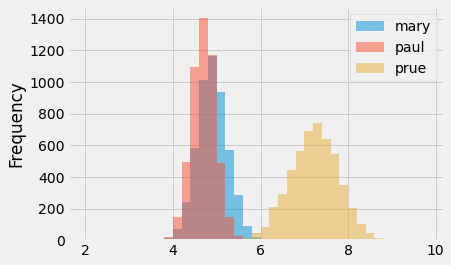

In [74]:
reps = 5000

mary_df = technical_challenge_recipes[technical_challenge_recipes.get('Whose') == 'Mary']
paul_df = technical_challenge_recipes[technical_challenge_recipes.get('Whose') == 'Paul']
prue_df = technical_challenge_recipes[technical_challenge_recipes.get('Whose') == 'Prue']

mary_boot_means = simulate_estimates(mary_df, 'DifficultyScore', reps)
paul_boot_means = simulate_estimates(paul_df, 'DifficultyScore', reps)
prue_boot_means = simulate_estimates(prue_df, 'DifficultyScore', reps)

# Plot your overlaid histogram here.
bpd.DataFrame().assign(
    mary=mary_boot_means,
    paul=paul_boot_means,
    prue=prue_boot_means
).plot(kind='hist', bins=np.arange(2,10,0.2), alpha=0.5);

Now I want to calculate three 95% confidence intervals for the mean difficulty score of recipes from each of the three judges. To do this, I have created a function `confidence_interval_95`, which takes in an array of bootstrapped statistics `boot_stats` and returns a list of length two, containing the left endpoint and the right endpoint of the 95% confidence interval. 

In [76]:
def confidence_interval_95(boot_stats):
    '''Returns a list of the endpoints of a 95% confidence interval based on boot_stats.'''
    left = np.percentile(boot_stats, 2.5)
    right = np.percentile(boot_stats, 97.5)
    return[left, right]

print("Mary 95% CI:", confidence_interval_95(mary_boot_means))
print("Paul 95% CI:", confidence_interval_95(paul_boot_means))
print("Prue 95% CI:", confidence_interval_95(prue_boot_means))

Mary 95% CI: [4.256250000000001, 5.593750000000001]
Paul 95% CI: [4.175609756097561, 5.248780487804879]
Prue 95% CI: [6.139999999999999, 8.26]


Based on the results, Mary and Paul's confidence intervals overlap Mary's confidence interval is wider than Paul's. Prue's confidence interval is wider than Mary's.

You will see that Prue's confidence interval is almost twice as wide as the other two judges' confidence intervals. Prue's confidence interval wider because she has posed fewer Technical Challenges.

It's clear that Prue's recipes have a very different difficulty level than the recipes of the other two judges. Now let's address a different question: how does the average difficulty of Paul's recipes compare to the average difficulty of Mary's recipes? 

The DataFrame called `mary_only` contains only the recipes in our original `technical_challenge_recipes` sample from Mary's collection. The DataFrame called `paul_only` contains only the recipes in our original sample from Paul's collection. I have set `observed_diff_mean` to the difference in mean difficulty score between Mary's recipes and Paul's recipes in our sample (subtract in the order Mary minus Paul).

In [82]:
mary_only = technical_challenge_recipes[technical_challenge_recipes.get('Whose') == 'Mary']
paul_only = technical_challenge_recipes[technical_challenge_recipes.get('Whose') == 'Paul']
observed_diff_mean = mary_only.get('DifficultyScore').mean() - paul_only.get('DifficultyScore').mean()
observed_diff_mean

0.19756097560975672

So there is definitely a difference in mean difficulty scores between Mary's and Paul's Technical Challenge recipes, within our sample of recipes that have appeared as Technical Challenges in the show. But does this reflect a difference in mean recipe difficulty scores in the population (the judges' recipe collections), or was it by chance that our sample's difficulty displayed this difference? I will do a hypothesis test to find out. I'll state our hypotheses as follows:

- **Null Hypothesis:** The mean difficulty of Mary's recipe collection equals the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipes equals 0.
- **Alternative Hypothesis:** The mean difficulty of Mary's recipe collection does not equal the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipe does not equal 0.

Since I were able to set up the hypothesis test as a question of whether our population parameter – the difference in mean difficulty scores for Mary's and Paul's recipe collections – is equal to a certain value, we can **test my hypotheses by constructing a confidence interval for the parameter**.

**Question 5.8.** Compute 1000 bootstrapped estimates for the difference in the mean difficulty for Mary's recipes and Paul's recipes (subtract in the order Mary minus Paul). Store your 1000 estimates in the `difference_means` array.

You should generate your resamples of Mary's recipes by sampling from `mary_only`, and similarly for Paul, by sampling from `paul_only`. You should not use `technical_challenge_recipes` at all.

In [84]:
np.random.seed(57) # Don't change this. This is for the autograder.

difference_means = simulate_estimates(mary_only, 'DifficultyScore', 1000) - simulate_estimates(paul_only, 'DifficultyScore', 1000)


# Just display the first ten differences.
difference_means[:10]

array([ 0.4304878 ,  0.45609756,  0.36829268,  0.31097561,  0.90167683,
        0.45518293,  0.6527439 , -0.07606707,  1.10685976,  0.35960366])

Let's visualize the estimates:

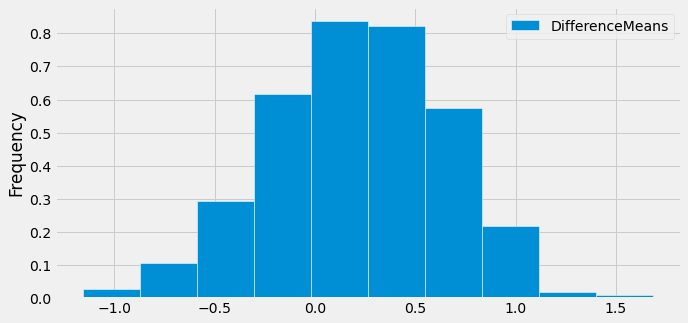

In [86]:
(bpd.DataFrame().assign(DifferenceMeans = difference_means)
 .plot(kind='hist', density=True, ec='w', figsize=(10, 5)));

I will use thee function `confidence_interval_95` to compute a 95% confidence interval for the difference in the mean difficulty of Mary's and Paul's recipes (as before, Mary's minus Paul's). I will assign to `mary_paul_difference_CI` a list containing the endpoints of this confidence interval.

In [87]:
mary_paul_difference_CI = confidence_interval_95(difference_means)
mary_paul_difference_CI

[-0.669062499999999, 1.0327934451219507]

Recalling the hypotheses I am testing:
- **Null Hypothesis:** The mean difficulty of Mary's recipe collection equals the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipes equals 0.
- **Alternative Hypothesis:** The mean difficulty of Mary's recipe collection does not equal the mean difficulty of Paul's recipe collection. Equivalently, the difference in the mean difficulty for Mary's and Paul's recipe does not equal 0.

Based on the confidence interval i've created, we would not reject the null hypothesis at 0.05 significance level

I have now uncovered some interesting facts about the difficulty levels of the different judges' recipe collections. However, I also want to know whether the judges' recipe collections have other differences. For example, do certain judges have recipes with more ingredients, more components, or longer instructions?

To do this, I want to generalize our simulation code so that I can create a confidence interval for any variable.

I created a function called `bootstrap_estimation`, which takes in 4 inputs:
- `sample_df`, A DataFrame with a row for each element of the original sample (Technical Challenge recipes posed by one or more judges)
- `judges`, a list of judge's names we want to compare (can be of any length)
- `variable`, the column name of the relevant variable, whose mean we want to estimate 
- `repetitions`, the number of repetitions to perform (i.e., the number of resamples to create)

1. The function generates an overlaid histogram showing each of the specified judges' simulated means of the given variable.
2. The function prints a sentence with the 95% confidence interval for the mean value of the given variable for each of the specified judges. 
3. The function should return nothing.

Mary 95% CI: [5.15625, 7.09375]
Paul 95% CI: [5.853658536585366, 7.610365853658536]
Prue 95% CI: [8.0, 13.4]


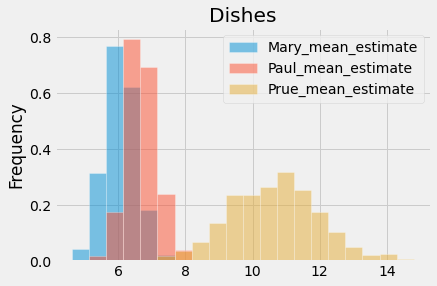

In [91]:
def bootstrap_estimation(sample_df, judges, variable, repetitions):
    '''Generates a histogram and for each judge, a confidence interval for the mean value of the variable from sample_df.'''
    
    means = np.array([])
    judge_cols = np.array([])
    df = bpd.DataFrame()
    
    for judge in judges:
        judge_only = sample_df[sample_df.get('Whose') == judge]
        boot_means = simulate_estimates(judge_only, variable, repetitions)
        judge_cols = np.append(judge_cols, (judge + "_mean_estimate"))
        
        print(judge + " 95% CI:", confidence_interval_95(boot_means))
        
        means = np.append(means, boot_means)
        
        if (judge == 'Mary'):
            df = df.assign(
                Mary_mean_estimate=boot_means
            )
        elif (judge == 'Paul'):
            df = df.assign(
                Paul_mean_estimate=boot_means
            )
        elif (judge == 'Prue'):
            df = df.assign(
                Prue_mean_estimate=boot_means
            )

    df.plot(kind='hist', density=True, ec='w', bins=20, alpha=0.5, title='Dishes');
    

# Try to replicate the graph shown in the example.
bootstrap_estimation(technical_challenge_recipes, ['Mary', 'Paul', 'Prue'], 'Dishes', 1000)

I will use the `bootstrap_estimation` function to create histograms and confidence intervals.

In [92]:
technical_challenge_recipes

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
0,1,1,Victoria Sandwich,Mary,https://thegreatbritishbakeoff.co.uk/victoria-...,2,9,25,5,3.2
1,1,2,Scone,Paul,https://thegreatbritishbakeoff.co.uk/scones/,1,5,15,6,1.8
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
4,1,5,Cornish pasties,Paul,https://www.bbc.com/food/recipes/classic_corni...,2,11,32,4,3.4
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5_12
manual: True
points: 2

-->

Mary 95% CI: [28.09296875, 37.87578125]
Paul 95% CI: [24.78048780487805, 31.659146341463416]


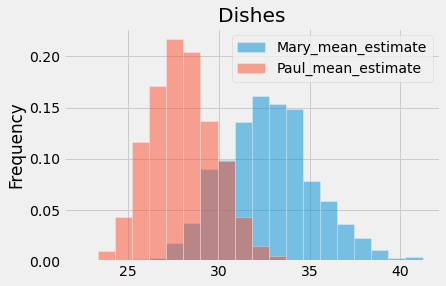

In [93]:


bootstrap_estimation(technical_challenge_recipes, ['Mary','Paul'], 'RecipeSentences', 1000)

<!-- END QUESTION -->

Mary 95% CI: [9.15625, 11.1875]
Paul 95% CI: [9.439024390243903, 12.512195121951219]
Prue 95% CI: [12.6, 15.9]


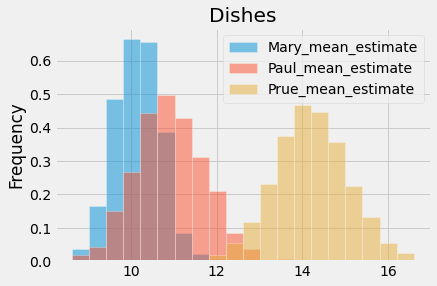

In [94]:


bootstrap_estimation(technical_challenge_recipes, ['Mary','Paul', 'Prue'], 'IngredCount', 1000)

<a id='section6'></a>
## Section 6: Piece of Cake? 🍰

In this section of the project, we'll focus on probability.

I wonder if it takes a lot of skill to win the bake off. If I randomly select a (series) winner from the first ten seasons of the show, what is the probability that they came first in one of the Technical Challenges? I will use the `bakers` DataFrame to calculate this probability and assign the answer to the variable `p_tech_given_win`.



In [95]:
bakers[bakers.get('series_winner')>=1]

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,100.0,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M,Young
15,2,Joanne,1,3,4,4,1.0,11.0,4.5,1,...,100.0,50.000000,"Joanne ""Jo"" Wheatley",41,Housewife,"Ongar, Essex",Wheatley,Joanne,F,Middle-Aged
26,3,John,1,1,6,4,1.0,11.0,3.0,1,...,100.0,60.000000,John Whaite,22,Law student,Wigan,Whaite,John,M,Young
38,4,Frances,1,1,7,3,1.0,8.0,3.0,1,...,100.0,70.000000,Frances Quinn,31,Children's Clothes Designer,"Market Harborough, Leicestershire",Quinn,Frances,F,Young
56,5,Nancy,1,3,7,3,1.0,5.0,2.5,1,...,100.0,70.000000,Nancy Birtwhistle,60,Retired Practice Manager,"Barton-upon-Humber, Lincolnshire",Birtwhistle,Nancy,F,Elderly
65,6,Nadiya,1,4,4,6,1.0,12.0,4.0,1,...,100.0,40.000000,Nadiya Hussain,30,Full-time mother,Leeds / Luton,Hussain,Nadiya,F,Young
73,7,Candice,1,1,7,3,1.0,8.0,2.5,1,...,100.0,70.000000,Candice Brown,31,PE teacher,"Barton-Le-Clay, Bedfordshire",Brown,Candice,F,Young
90,8,Sophie,1,2,6,4,1.0,6.0,2.5,1,...,100.0,60.000000,Sophie Faldo,33,Former army officer and trainee stuntwoman,"West Molesey, Surrey",Faldo,Sophie,F,Young
104,9,Rahul,1,1,5,5,1.0,7.0,3.5,1,...,100.0,50.000000,Rahul Mandal,30,Research scientist,Rotherham,Mandal,Rahul,M,Young
110,10,David,1,2,8,2,1.0,10.0,2.0,1,...,100.0,80.000000,David Atherton,36,International health adviser,Whitby,Atherton,David,M,Young


In [96]:
p_tech_given_win = 10/10
p_tech_given_win

1.0

I wonder how frequently winners are recognized with the special designation of Star Baker ⭐. If I randomly select a winner from the first ten seasons of the show the probability would be 9/10

In [98]:
p_star_given_win = 9/10
p_star_given_win

0.9

Among bakers who satisfy one condition (winning), what is the probability they satisfy another condition (placing first in a technical, or earning Star Baker ⭐). Let's generalize the code for these calculations so that I can easily compute conditional probabilities with other conditions.

I will implement the function `conditional_probability`. It has two arguments, `find` and `given`, both of which are lists. Let's walk through how it works, using an example – suppose we want to use it to compute the probability that a randomly selected contestant from `bakers` was a Star Baker ⭐, given that they won (the same probability that you computed in the previous question.)

- `find` is a list of two elements:
    - The first element in `find` is the column in `bakers` that contains the event that I am trying to find the probability of. This can be any column in `baker`; in our example, this is `'star_baker'`. 
    - The second element in `find` is the value in the aforementioned column that I am trying to find; in the example, this is `1`.
- `given` is a list of two elements:
    - The first element in `given` is the column in `bakers` that contains the event that is given to be true. This can also be any column in `baker`; in the example, this is `'series_winner'`. 
    - The second element in `given` is the value in the aforementioned column; in the example, this is `1`.

Putting this all together, this means that `conditional_probability(['star_baker', 1], ['series_winner', 1])` should evaluate to my answer from the previous part (but the `conditional_probability` function should work for any example, not just this one).


In [100]:
def conditional_probability(find, given):
    '''Returns the conditional probability of an event given a known condition.'''
    column_find = find[0]
    value_find = find[1]
    column_given = given[0]
    value_given = given[1]
    value_df = bakers[bakers.get(column_given) == value_given]
    desired_df = value_df[value_df.get(column_find) == value_find]
    return desired_df.shape[0] / value_df.shape[0]
    
# This should evalaute to your answer to Question 6.2
conditional_probability(['star_baker', 1], ['series_winner', 1])

0.9

In [102]:
bakers

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
0,1,Annetha,0,0,1,1,2.0,7.0,4.5,0,...,33.333333,50.000000,Annetha Mills,30,Midwife,Essex,Mills,Annetha,F,Young
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M,Young
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M,Young
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F,Middle-Aged
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,Michelle,1,0,0,5,5.0,8.0,6.0,0,...,50.000000,0.000000,Michelle Evans-Fecci,35,Print shop administrator,"Tenby, Wales",Evans-Fecci,Michelle,F,Young
116,10,Phil,0,0,1,3,3.0,10.0,7.0,0,...,40.000000,25.000000,Phil Thorne,56,HGV driver,Rainham,Thorne,Phil,M,Middle-Aged
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F,Young
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F,Young


I will now use the function `conditional_probability` to calculate the following probabilities:
- `p_female_given_young`: The probability that a randomly chosen young contestant is female. 👧🏽
- `p_female_given_elderly`: The probability that a randomly chosen elderly contestant is female. 👵

In [103]:
p_female_given_young = conditional_probability(['gender', 'F'], ['age_category', 'Young'])
p_female_given_elderly = conditional_probability(['gender', 'F'], ['age_category', 'Elderly'])

# Don't change the code below.
print(f'''P(female given young) = {p_female_given_young}
P(female given elderly) = {p_female_given_elderly}''')

P(female given young) = 0.4675324675324675
P(female given elderly) = 0.75


Suppose the producers of the show want to do a special episode bringing back past contestants, as they often do for the holidays 🎄🕎. They decide to choose one contestant at random from each of the first ten seasons. I will calculate the probability that there is at least one winner selected and assign the answer to `p_include_winner`.

In [105]:
x = np.array([])

for i in np.arange(10):
    probability = conditional_probability( ['series_winner', 0], ['series', i + 1])
    x = np.append(x, probability)
    
    
p_include_winner = 1 - np.prod(x)
p_include_winner

0.5829401615233947

In [107]:
above_5 = technical_challenge_recipes[technical_challenge_recipes.get('DifficultyScore') > 5]
above_5

,Ssn,Ep,Item,Whose,Link,Components,IngredCount,RecipeSentences,Dishes,DifficultyScore
2,1,3,Cob,Paul,https://www.bbc.com/food/recipes/paul_hollywoo...,1,6,40,9,5.6
3,1,4,Lemon Souffle,Mary,https://www.bbc.com/food/recipes/mary_berrys_l...,1,10,43,8,5.2
5,2,1,Coffee and Walnut Battenburg,Mary,https://www.bbc.com/food/recipes/coffee_and_wa...,3,13,38,4,5.4
9,2,5,Mini pork pies,Paul,https://thegreatbritishbakeoff.co.uk/mini-pork...,2,11,38,6,6.0
13,3,1,Rum Baba,Paul,https://www.bbc.com/food/recipes/rum_babas_ser...,3,13,33,4,5.2
...,...,...,...,...,...,...,...,...,...,...
78,9,6,Puits d'amour,Prue,https://thegreatbritishbakeoff.co.uk/prues-pui...,4,15,46,6,7.0
79,9,7,Vegan pavlova,Prue,https://thegreatbritishbakeoff.co.uk/vegan-tro...,5,18,29,11,8.4
80,9,8,Aebleskiver,Paul,https://thegreatbritishbakeoff.co.uk/aebleskiver/,3,16,29,15,7.2
81,9,9,Torta Setteveli,Prue,https://thegreatbritishbakeoff.co.uk/torta-set...,8,14,65,18,9.6


In [108]:
technical_challenge_recipes.shape[0]

83

Let's say I have dreams 💭 of being on the bake off myself, and to practice, I decide to bake 10 Technical Challenge recipes, chosen at random **with replacement** from the `technical_challenge_recipes` DataFrame. What will be the probability that all 10 of them have a `'DifficultyScore'` greater than 5? I will assign my answer to `p_all_above_5`.

In [109]:
proportion_above_5 = above_5.shape[0] / technical_challenge_recipes.shape[0]

p_all_above_5 = proportion_above_5 ** 10
p_all_above_5

0.0005246445267175485

After putting in a lot of time practicing the Technical Challenge recipes, I feel that I need to get some advice from a former participant. I originally had all their names and phone numbers ☎️ written down in your notebook 📓, but your dog 🐶 ate the portion of the notebook with their names, leaving me with a list of just phone numbers. I am left with no choice but to call one of them at random.

But I also want quality advice, which in your mind are participants who have:
- remained in the show for at least half a season, and
- placed in the top 3 in at least one of the Technical Challenges.

What will be the probability that I will get quality advice from calling a random number from the list in your notebook? I will assign my answer to `p_quality_advice`.

In [111]:
baker_top = bakers[bakers.get('technical_top3') >= 1]
baker_top = baker_top[baker_top.get('percent_episodes_appeared') >= 50]
baker_top

,series,baker,star_baker,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,technical_median,series_winner,...,percent_episodes_appeared,percent_technical_top3,baker_full,age,occupation,hometown,baker_last,baker_first,gender,age_category
1,1,David,0,0,1,3,3.0,8.0,4.5,0,...,66.666667,25.000000,David Chambers,31,Entrepreneur,Milton Keynes,Chambers,David,M,Young
2,1,Edd,0,2,4,1,1.0,6.0,2.0,1,...,100.000000,66.666667,"Edward ""Edd"" Kimber",24,Debt collector for Yorkshire Bank,Bradford,Kimber,Edward,M,Young
3,1,Jasminder,0,0,2,2,2.0,5.0,3.0,0,...,83.333333,40.000000,Jasminder Randhawa,45,Assistant Credit Control Manager,Birmingham,Randhawa,Jasminder,F,Middle-Aged
4,1,Jonathan,0,1,1,2,1.0,9.0,6.0,0,...,50.000000,33.333333,Jonathan Shepherd,25,Research Analyst,St Albans,Shepherd,Jonathan,M,Young
8,1,Miranda,0,2,4,1,1.0,8.0,3.0,0,...,100.000000,66.666667,Miranda Gore Browne,37,Food buyer for Marks & Spencer,"Midhurst, West Sussex",Browne,Miranda,F,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,10,Helena,0,1,1,4,1.0,12.0,9.0,0,...,50.000000,20.000000,Helena Garcia,40,Online project manager,Leeds,Garcia,Helena,F,Middle-Aged
112,10,Henry,1,2,5,3,1.0,6.0,3.0,0,...,80.000000,62.500000,Henry Bird,20,Student,Durham,Bird,Henry,M,Young
117,10,Priya,0,0,1,5,2.0,10.0,7.0,0,...,60.000000,16.666667,Priya O'Shea,34,Marketing consultant,Leicester,O'Shea,Priya,F,Young
118,10,Rosie,0,2,4,5,1.0,9.0,4.0,0,...,90.000000,44.444444,Rosie Brandreth-Poynter,28,Veterinary surgeon,Somerset,Brandreth-Poynter,Rosie,F,Young


In [112]:
p_quality_advice = baker_top.shape[0] / bakers.shape[0]
p_quality_advice

0.6

<a id='section7'></a>
## Section 7: Recipe Name Generator 👩‍🍳🖨️

After seeing the creative bakes featured in the Signature and Showstopper Challenges, I am feeling inspired to invent some new recipes myself. Instead of letting my tastebuds and my better judgment guide me, I decide to generate recipe titles *randomly* in a systematic way. 

All of the recipe titles will consist words chosen randomly from a limited set of options. There are **three categories of words**:
1. *Ingredients* 
    - For example, "Chocolate", "Pumpkin", and "Mint".
    
2. *Items* 
    - For example, "Cupcakes", "Croissants", and "Biscuits".
    
3. *Extras* 
    - For example, "Meringue", "Swirl", and "Ganache".

To generate a recipe title, i'll first randomly select a template for the recipe title. There are **four recipe templates**:
1. *Ingredient Ingredient Item with Ingredient Extra* 
    - For example, "Chocolate Mint Cupcakes with Pumpkin Swirl".
2. *Item with Ingredient Extra*  
    - For example "Croissants with Mint Ganache".
3. *Ingredient, Ingredient, and Ingredient Item* 
    - For example, "Mint, Chocolate, and Pumpkin Biscuits".
4. *Ingredient Ingredient Item* 
    - For example, "Pumpkin Chocolate Croissants".

Once I have determined the template, I will randomly select *Ingredients*, *Items*, and *Extras* in the appropriate quantities. Each category of words has an associated probability distribution that describes the likelihood of each word in the category being chosen. 

In [115]:
ingredient_df = bpd.read_csv('data/ingredients.csv')
ingredient_df

,ingredients,probabilities
0,Chocolate,0.1
1,Blueberry,0.1
2,Lemon,0.1
3,Orange,0.1
4,Ginger,0.1
5,Pumpkin,0.1
6,Strawberry,0.1
7,Blackberry,0.1
8,Mint,0.1
9,Carrot,0.1


In [116]:
item_df = bpd.read_csv('data/items.csv')
item_df

,items,probabilities
0,Cupcakes,0.12
1,Croissants,0.08
2,Cake,0.02
3,Mousse,0.04
4,Pastries,0.22
...,...,...
8,Traybake,0.03
9,Tart,0.11
10,Roulade,0.08
11,Biscuits,0.05


In [117]:
extra_df = bpd.read_csv('data/extras.csv')
extra_df

,extras,probabilities
0,Icing,0.29
1,Buttercream,0.02
2,Meringue,0.09
3,Puree,0.10
4,Sauce,0.11
...,...,...
6,Stuffing,0.02
7,Topping,0.14
8,Swirl,0.01
9,Ganache,0.15


The function `one_recipe` generates a random recipe title using the process described above. I will start by choosing one of the four possible templates at random, such that each has an equal probability of being selected. Once I have my template, I will select words from `ingredient_df`, `item_df`, and `extra_df` as required. 

If I need to select multiple ingredients, I will make sure to choose them **without replacement** because each ingredient should only occur once in a recipe title. For example, I should not generate "Pumpkin Pumpkin Cupcakes". 

The function `one_recipe` should return the title of one randomly generated recipe.


In [118]:
 np.random.choice(ingredient_df.get('ingredients'), 1)[0]

'Blueberry'

In [136]:
# Templates:
# 1. Ingredient Ingredient Item with Ingredient Extra 
# 2. Item with Ingredient Extra  
# 3. Ingredient, Ingredient, and Ingredient Item 
# 4. Ingredient Ingredient Item

def one_recipe():
    template = np.random.choice([1, 2, 3, 4], 1)[0]
    recipe = ""

    if template == 1:
        ingredient_array = np.random.choice(ingredient_df.get('ingredients'), 3, replace=False)
        item_array = np.random.choice(item_df.get('items'), 1, p=item_df.get('probabilities'))
        extra_array = np.random.choice(extra_df.get('extras'), 1, p=extra_df.get('probabilities'))
        recipe = ingredient_array[0] + ' ' + ingredient_array[1] + ' ' + item_array[0] + ' with ' + ingredient_array[2] + ' ' + extra_array[0]
    
    elif template == 2:
        item_array = np.random.choice(item_df.get('items'), 1, p=item_df.get('probabilities'))
        ingredient_array = np.random.choice(ingredient_df.get('ingredients'), 1)
        extra_array = np.random.choice(extra_df.get('extras'), 1, p=extra_df.get('probabilities'))
        recipe = item_array[0] + ' with ' + ingredient_array[0] + ' ' + extra_array[0]
    
    elif template == 3:
        ingredient_array = np.random.choice(ingredient_df.get('ingredients'), 3, replace=False)
        item_array = np.random.choice(item_df.get('items'), 1, p=item_df.get('probabilities'))
        recipe = ingredient_array[0] + ', ' + ingredient_array[1] + ', and ' + ingredient_array[2] + ' ' + item_array[0]

    else:
        ingredient_array = np.random.choice(ingredient_df.get('ingredients'), 2, replace=False)
        item_array = np.random.choice(item_df.get('items'), 1, p=item_df.get('probabilities'))
        recipe = ingredient_array[0] + ' ' + ingredient_array[1] + ' ' + item_array[0]
        
    return recipe

one_recipe()

'Chocolate Pumpkin Pastries'

I have generated 10,000 recipe titles and stored them in an array called `recipe_titles`. 

In [138]:
recipe_titles = np.array([])

for i in np.arange(10000):
    recipe = one_recipe()
    recipe_titles = np.append(recipe_titles, recipe)

recipe_titles

array(['Blueberry, Strawberry, and Blackberry Pastries',
       'Pumpkin, Mint, and Blueberry Buns',
       'Croissants with Orange Topping', ..., 'Mousse with Pumpkin Sauce',
       'Pastries with Mint Ganache',
       'Pumpkin, Strawberry, and Chocolate Croissants'], dtype='<U56')

I firmly believe that chocolate makes everything better. 🍫 🩹 I will use the 10,000 recipe titles that you generated to estimate the probability that a randomly generated recipe title includes the word "Chocolate". Then store my estimate in the variable `prob_chocolate`.

In [140]:
Title = bpd.DataFrame().assign(
titles = recipe_titles 
)
Title

,titles
0,"Blueberry, Strawberry, and Blackberry Pastries"
1,"Pumpkin, Mint, and Blueberry Buns"
2,Croissants with Orange Topping
3,Orange Carrot Loaf
4,Carrot Ginger Croissants with Blackberry Reduc...
...,...
9995,Tart with Blueberry Topping
9996,Blackberry Carrot Pastries with Ginger Topping
9997,Mousse with Pumpkin Sauce
9998,Pastries with Mint Ganache


In [141]:
Chocolate_df = Title[Title.get('titles').str.contains('Chocolate')]
Chocolate_df

,titles
8,"Orange, Pumpkin, and Chocolate Pastries"
10,Cupcakes with Chocolate Ganache
12,Ginger Chocolate Buns
14,"Strawberry, Orange, and Chocolate Pastries"
19,Orange Chocolate Pudding with Blueberry Icing
...,...
9978,Chocolate Strawberry Pastries with Blueberry F...
9981,Chocolate Blueberry Pudding with Orange Stuffing
9991,"Chocolate, Blueberry, and Pumpkin Pastries"
9992,"Chocolate, Blackberry, and Mint Tart"


In [142]:
count = 0

for recipe in recipe_titles:
    if "Chocolate" in recipe:
        count += 1

prob_chocolate = count / 10000
prob_chocolate

0.2269

I am also a big fan of cupcakes. 🧁 I will use the 10,000 recipe titles that I generated to estimate the probability that a randomly generated recipe title includes the word "Cupcakes". Then I will store my estimate in the variable `prob_cupcakes`.

In [144]:
Cupcake_df = Title[Title.get('titles').str.contains('Cupcakes')]
Cupcake_df

,titles
10,Cupcakes with Chocolate Ganache
24,Orange Blueberry Cupcakes
32,Blackberry Lemon Cupcakes with Mint Sauce
37,Cupcakes with Blueberry Ganache
48,Orange Blackberry Cupcakes with Ginger Ganache
...,...
9961,Pumpkin Chocolate Cupcakes
9970,Cupcakes with Chocolate Icing
9972,Cupcakes with Ginger Filling
9983,Blackberry Carrot Cupcakes


In [145]:
count = 0

for recipe in recipe_titles:
    if "Cupcakes" in recipe:
        count += 1

prob_cupcakes = count / 10000
prob_cupcakes

0.1205

I have found that my estimate for the probability of a randomly generated recipe containing the word "Chocolate" is significantly higher than the probability associated with the word "Chocolate" in `ingredient_df`. Yet, I also should have found that my estimate, the probability of a randomly generated recipe containing the word "Cupcakes", is about the same as the probability associated with the word "Cupcakes" in `item_df`. 

In [249]:
print("The probability associated with Chocolate in the DataFrame is "+
      str(ingredient_df.get('probabilities').iloc[0])+
      " and your estimated probability of Chocolate is "+
      str(prob_chocolate)+".\n")

print("The probability associated with Cupcakes in the DataFrame is "+
      str(item_df.get('probabilities').iloc[0])+
      " and your estimated probability of Cupcakes is "+
      str(prob_cupcakes)+".")

The probability associated with Chocolate in the DataFrame is 0.1 and your estimated probability of Chocolate is 0.2272.

The probability associated with Cupcakes in the DataFrame is 0.12 and your estimated probability of Cupcakes is 0.1186.



The reason the probability for "Chocolate" is much higher than its value in the DataFrame as compared to "Cupcakes" is because in the recipe titles, it is common to have multiple ingredients meaning that the word "Chocolate" has a much higher chance of showing up in any given title since it is an ingredient especially over 10,000 iterations. However, items such as "Cupcakes" are limited to one occurrence per recipe title meaning that it will not show up as much over 10,000 repetitions.

<!-- END QUESTION -->



<a id='section8'></a>
## Section 8: Dishwashing 🧼🍽️

In this section, I will explore whether the difficulty of a recipe is correlated with the number of dirty dishes it produces. Regression is helpful when we want to use one numerical value to predict another numerical value.

Let's start by visualizing the data with a scatter plot to see if linear regression would make sense for this dataset.

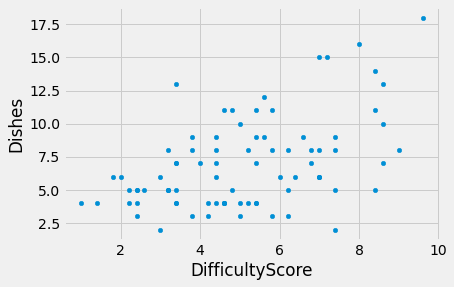

In [147]:
technical_challenge_recipes.plot(kind='scatter', x='DifficultyScore', y='Dishes');

Based on the scatter plot, it seems like linear regression would be an appropriate tool. Let's proceed!

The function `standard_units` takes in an array or Series and returns an array with the values in standard units. I will use the function to standardize the `'DifficultyScore'` and `'Dishes'` columns from `technical_challenge_recipes`. Next, I will store the standardized arrays in the variables `difficulty_standard` and `dishes_standard`. 


In [149]:
def standard_units(sequence):
    '''Returns the input sequence as an array in standard units.'''
    # Convert the input to an array, if it is not already.
    sequence = np.array(sequence)
    
    mean = np.nanmean(sequence)
    sd = np.nanstd(sequence)
    
    return ((sequence - mean) / sd)

difficulty_standard = standard_units(technical_challenge_recipes.get('DifficultyScore'))
dishes_standard = standard_units(technical_challenge_recipes.get('Dishes'))
print(difficulty_standard, dishes_standard)

[-0.94626811 -1.64931386  0.25895317  0.05808295 -0.84583301  0.15851806
 -0.34365747 -2.05105429 -1.34800854  0.45982338 -1.24757343 -0.44409258
 -0.34365747  0.05808295 -1.34800854 -1.34800854 -1.04670322  0.15851806
 -1.04670322 -0.64496279 -0.04235215  0.96199891  0.66069359 -0.04235215
 -1.85018407 -0.34365747 -0.94626811 -0.34365747 -0.24322237 -0.04235215
  0.56025849  1.76547977  0.15851806 -1.44844365 -0.84583301 -1.54887875
 -0.14278726 -0.24322237  1.66504466 -0.54452769  0.86156381  0.56025849
  0.96199891  1.16286913 -0.24322237 -1.34800854  0.86156381  0.15851806
  0.96199891  1.16286913  1.16286913 -0.84583301  1.16286913 -0.84583301
 -0.84583301  0.35938827 -0.84583301 -0.44409258 -0.14278726  1.66504466
 -1.44844365  0.96199891 -0.94626811  0.7611287  -0.34365747 -0.24322237
  0.25895317 -0.94626811  0.15851806 -0.64496279 -0.24322237  1.96634998
  0.35938827  0.35938827  1.76547977 -0.64496279  1.46417445  0.56025849
  0.96199891  1.66504466  1.06243402  2.2676553   1

The function `correlation` takes in:
1. `df`, a DataFrame,
2. `independent`, the column label of the independent ($x$) variable, as a string, and 
3. `dependent`, the column label of the dependent ($y$) variable, as a string.

The function outputs the correlation between the two variables. As before, the function needs to work even if there are missing values in the DataFrame.

Then, I will use the function to compute the correlation between `'DifficultyScore'` and `'Dishes'` and store my result in the variable `corr`.

In [151]:
def correlation(df, independent, dependent):
    '''Returns the correlation between the independent and dependent variables in the given DataFrame.'''
    
    independent_su = standard_units(df.get(independent))
    dependent_su = standard_units(df.get(dependent))
    
    product = independent_su * dependent_su
    
    return np.nanmean(product)

corr = correlation(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
corr

0.4945693747864214

I wil construct two functions, `reg_slope` and `reg_intercept`, which each take in the same three inputs as `correlation`. `reg_slope` should return the slope of the regression line and `reg_intercept` should return the intercept of the regression line, in original units. As before, the function needs to work even if there are missing values in the DataFrame.

I will then use the function to store the slope and intercept of the regression line for  `'DifficultyScore'` and `'Dishes'` in the variables `slope` and `intercept`.

In [153]:
def reg_slope(df, independent, dependent):
    '''Returns the slope of the regression line in original units.'''
    
    r = correlation(df, independent, dependent)
    independent_sd = np.nanstd(np.array(df.get(independent)))
    dependent_sd = np.nanstd(np.array(df.get(dependent)))
    
    return r * (dependent_sd / independent_sd)

def reg_intercept(df, independent, dependent):
    '''Return the intercept of the regression line in original units.'''
    
    slope = reg_slope(df, independent, dependent)
    independent_mean = np.nanmean(np.array(df.get(independent)))
    dependent_mean = np.nanmean(np.array(df.get(dependent)))
    
    return (dependent_mean - (slope * independent_mean))

slope = reg_slope(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
intercept = reg_intercept(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
slope, intercept

(0.8421920391715867, 2.6336742104769924)

The function, `predict`, takes in the same three inputs as `correlation`. `predict` returns an array of predicted values of the dependent variable calculated from the regression line. 

I will then use the function to create an array of the predicted number of dirty dishes for each recipe in the `technical_challenge_recipes` DataFrame, based on the recipe's difficulty. I will then save the answer as `predicted_dishes`. 

Note to self: The predicted number of dirty dishes need not be a whole number.


In [155]:
def predict(df, independent, dependent):
    '''Returns an array of predicted values of the dependent variable calculated from the regression line.'''
    
    y_array = np.array(df.get(independent))
    slope = reg_slope(df, independent, dependent)
    intercept = reg_intercept(df, independent, dependent)
    
    return (intercept + (slope * y_array))

predicted_dishes = predict(technical_challenge_recipes, 'DifficultyScore', 'Dishes')
predicted_dishes

array([ 5.32868874,  4.14961988,  7.34994963,  7.01307281,  5.49712714,
        7.18151122,  6.33931918,  3.47586625,  4.6549351 ,  7.68682645,
        4.82337351,  6.17088077,  6.33931918,  7.01307281,  4.6549351 ,
        4.6549351 ,  5.16025033,  7.18151122,  5.16025033,  5.83400396,
        6.84463441,  8.52901848,  8.02370326,  6.84463441,  3.81274307,
        6.33931918,  5.32868874,  6.33931918,  6.50775759,  6.84463441,
        7.85526485,  9.87652575,  7.18151122,  4.4864967 ,  5.49712714,
        4.31805829,  6.676196  ,  6.50775759,  9.70808734,  6.00244237,
        8.36058008,  7.85526485,  8.52901848,  8.8658953 ,  6.50775759,
        4.6549351 ,  8.36058008,  7.18151122,  8.52901848,  8.8658953 ,
        8.8658953 ,  5.49712714,  8.8658953 ,  5.49712714,  5.49712714,
        7.51838804,  5.49712714,  6.17088077,  6.676196  ,  9.70808734,
        4.4864967 ,  8.52901848,  5.32868874,  8.19214167,  6.33931918,
        6.50775759,  7.34994963,  5.32868874,  7.18151122,  5.83

I used the strategy for overlaying scatter plots described in(https://notes.dsc10.com/03-visualization/intro.html#overlaying-scatters-lines-and-histograms) to create an overlaid scatter plot with:
- a blue dot 🔵 for each recipe showing the difficulty on the $x$-axis and the number of dirty dishes on the $y$-axis (as in the scatter plot at the beginning of this section), and
- a red dot 🔴 for each recipe showing the difficulty on the $x$-axis and the **predicted** number of dirty dishes on the $y$-axis.

The red dots should form a straight line - that's the regression line!

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q8_5
points: 1
manual: True
-->

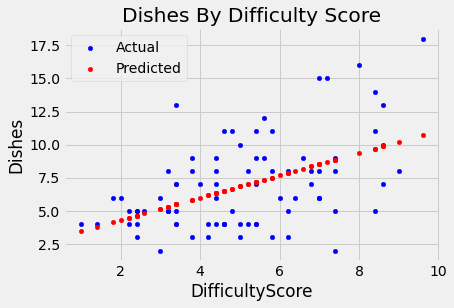

In [157]:
# Create your overlaid scatter plot here.
ax = technical_challenge_recipes.plot(kind='scatter', x='DifficultyScore', y='Dishes',
                                     label='Actual', color='blue')
bpd.DataFrame().assign(
    DifficultyScore=technical_challenge_recipes.get('DifficultyScore'),
    Dishes=predicted_dishes
).plot(ax=ax, kind='scatter', x='DifficultyScore', y='Dishes', 
       label='Predicted', color='red', title='Dishes By Difficulty Score');

<!-- END QUESTION -->

I will use the equation of the regression line to answer the following questions.

1.  A recipe for crème caramel 🍮 has a difficulty score of 7.5. What is the predicted number of dirty dishes for this recipe? The answer will be saved as `creme_caramel`.
2. A basic recipe for chocolate chip cookies 🍪 has a difficulty score of $d$ and an advanced recipe for gourmet chocolate chip cookies 🍪 has a difficulty score of $d+2$. How many additional dirty dishes would we predict the advanced recipe to create, as compared to the basic one? The answer will be saved as `cookies`.
3. A recipe for pretzels 🥨 is predicted to create 6 dirty dishes. What is the difficulty of this recipe? Round to the nearest whole number and the answer will be saved as `pretzels`.

In [158]:
slope = reg_slope(technical_challenge_recipes, "DifficultyScore", "Dishes")
intercept = reg_intercept(technical_challenge_recipes, "DifficultyScore", "Dishes")

creme_caramel = (intercept + (7.5 * slope))
cookies = 2 * slope
pretzels = round((6 - intercept) / slope)
print("creme caramel: "+str(creme_caramel))
print("cookies: "+str(cookies))
print("pretzels: "+str(pretzels))

creme caramel: 8.950114504263894
cookies: 1.6843840783431734
pretzels: 4


Now that I have general code to calculate the regression line between any pair of variables in any DataFrame, let's generalize the code for the overlaid scatter plot so I can visualize relationships between other pairs of variables.

The function `display_predictions` below takes in the same three inputs as the `correlation` function, I will create an overlaid scatter plot and return a string describing the correlation between the variables and the slope and intercept of the regression line.

'The correlation between DifficultyScore and Dishes is 0.49.  The slope of the regression line is 0.84. The intercept of the regression line is 2.63.'

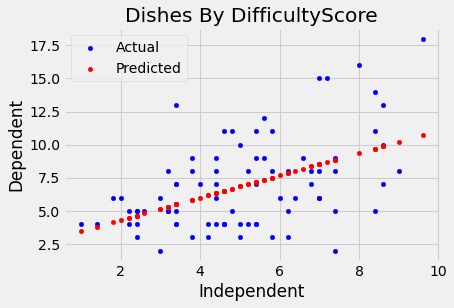

In [160]:
def display_predictions(df, independent, dependent):
    '''Generates an overlaid scatter plot showing the relationship between the independent and dependent variables in df.
    Returns a string describing the correlation and the slope and intercept of the regression line.'''
    # Create your overlaid scatter plot here.
    predicted = predict(df, independent, dependent)
    ax = df.plot(kind='scatter', x=independent, y=dependent,
                                     label='Actual', color='blue')
    bpd.DataFrame().assign(
        Independent=df.get(independent),
        Dependent=predicted
    ).plot(ax=ax, kind='scatter', x='Independent', y='Dependent', 
           label='Predicted', color='red', title= dependent + ' By ' + independent);
    
    # We've provided the code for the return statement.
    return ("The correlation between {0} and {1} is {2}. " +\
           " The slope of the regression line is {3}." + \
           " The intercept of the regression line is {4}.")\
                .format(independent, 
                        dependent, 
                        str(round(correlation(df, independent, dependent), 2)),
                        str(round(reg_slope(df, independent, dependent), 2)), 
                        str(round(reg_intercept(df, independent, dependent), 2)))

# Your function should produce the same scatter plot as in Question 8.5 on the inputs below. 
# Make sure to test it out on other inputs too.
display_predictions(technical_challenge_recipes, 'DifficultyScore', 'Dishes')

I will use the `display_predictions` function I just wrote, to create scatter plots and calculate regression lines that would help me answer each of the following questions. 

1. Do longer recipes with more sentences require more ingredients?
    - Store the output of your call to `display_predictions` in the variable `sentences_ingredients`.
2. Are recipes with more ingredients more difficult? 
    - Store the output of your call to `display_predictions` in the variable `ingredients_diff`.

'The correlation between RecipeSentences and IngredCount is 0.57.  The slope of the regression line is 0.19. The intercept of the regression line is 5.28.'

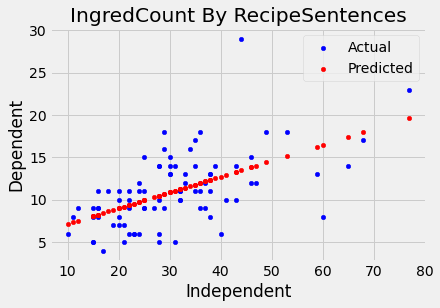

In [162]:
sentences_ingredients = display_predictions(technical_challenge_recipes, 'RecipeSentences', 'IngredCount')
sentences_ingredients

'The correlation between IngredCount and DifficultyScore is 0.76.  The slope of the regression line is 0.36. The intercept of the regression line is 1.15.'

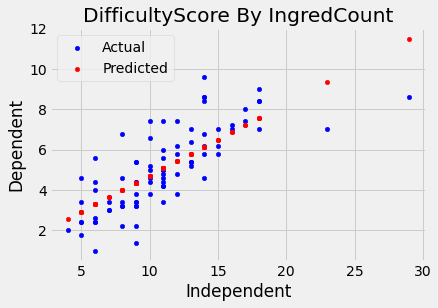

In [164]:
ingredients_diff = display_predictions(technical_challenge_recipes, 'IngredCount', 'DifficultyScore')
ingredients_diff

<a id='sources'></a>
## Data Sources 📖

- Hill A, Ismay C, Iannone R (2022). bakeoff: Data from "The Great British Bake Off". https://bakeoff.netlify.app/, https://github.com/apreshill/bakeoff.

- Davis, Erin (2019). Are Great British Bake Off Technical Challenges getting harder? https://erdavis.com/2019/06/08/are-great-british-bake-off-technical-challenges-getting-harder/, https://gist.github.com/erdavis1/09fd4a3aa424c5425a88d47f572ec20a.

- Ahamed, Nick (2019). Analyzing the Great British Bake Off. https://medium.com/analytics-vidhya/analyzing-the-great-british-bake-off-part-1-ffcdf3791bf3, https://medium.com/@nickahamed/analyzing-the-great-british-bake-off-part-2-1695ff95a0c9, https://docs.google.com/spreadsheets/d/1cvouOik_01QqtFQSq78xODIjcZZ8A-02VXa6IBvdG3I/edit#gid=0.